In [2]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import pandas as pd
import torchmetrics as tm
import numpy as np
import torch
import models.neural_net.metric as metric
from portfolios.portfolio_new import Portfolio

Device: cpu
Epochs: 100
Random seed set at: 21


In [3]:
predicted_ret_path = '/home/ge65cuw/thesis/saved/final_results/predicted_returns/'
# predicted_ret_path = '/home/ge65cuw/thesis/saved/results/FinalExpandingTuning/predicted_returns/'
predicted_ret_files = [f for f in listdir(predicted_ret_path) if isfile(join(predicted_ret_path, f))]

In [4]:
results_df = pd.read_csv('/home/ge65cuw/thesis/saved/final_results/results_df.csv', index_col=0)
# results_df.loc[results_df.trial_id == 16669034630977150]

In [5]:
pd.set_option('display.max_columns', None)
results_df.dropna()
#pd.reset_option('max_columns')


,trial_id,oosSpearman,MDA,Turnover_long_VW,Turnover_short_VW,Turnover_long-short_VW,Max1MLoss_VW,MaxDD_VW,Avg_ret_VW,Std_VW,Sharpe_ratio_VW,FF5_Mom_STRev_alpha_VW,alpha_t-stat_VW,regression_R2_VW,regression_Information_ratio_VW,Turnover_long_EW,Turnover_short_EW,Turnover_long-short_EW,Max1MLoss_EW,MaxDD_EW,Avg_ret_EW,Std_EW,Sharpe_ratio_EW,FF5_Mom_STRev_alpha_EW,alpha_t-stat_EW,regression_R2_EW,regression_Information_ratio_EW
3,16675591569102206,0.047900,0.513490,104.603741,98.862293,203.466034,23.570634,0.933369,0.682081,4.401826,0.154954,0.649911,2.708917,0.414949,0.167357,16.749990,20.088757,36.838747,8.499690,0.156025,0.538992,1.947638,0.276741,0.336189,3.789429,0.591356,0.234112
5,16643916099395694,0.065023,0.522107,153.776113,136.218964,289.995077,10.877526,0.257855,1.470866,3.759871,0.391201,1.397112,6.110469,0.105375,0.340523,21.600676,25.420293,47.020969,7.431330,0.122009,0.823414,1.948826,0.422518,0.676292,8.688863,0.614104,0.484211
6,16646102144393902,0.064185,0.523109,133.283963,117.340588,250.624551,9.798274,0.259321,1.481117,4.162314,0.355840,1.262000,5.984138,0.378960,0.333483,22.579898,25.021190,47.601088,9.545740,0.137660,0.889714,2.050543,0.433892,0.713126,7.848264,0.524970,0.437367
7,16672264033899982,0.053284,0.518772,109.092076,99.852837,208.944913,22.619657,0.657500,0.837860,3.804671,0.220219,0.959383,3.641429,0.055614,0.224968,17.548698,19.465652,37.014349,6.345677,0.067756,0.831304,1.680057,0.494807,0.620433,6.794185,0.418151,0.419746
8,16646998995991952,0.066319,0.523113,136.112668,130.478134,266.590803,9.532588,0.180216,1.421682,3.338844,0.425801,1.313700,6.651098,0.153383,0.370651,21.741773,25.147024,46.888797,9.491869,0.104873,0.863251,1.890709,0.456575,0.698746,9.395058,0.625662,0.523566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,16647612593160666,-0.004244,0.505308,84.775022,91.038742,175.813764,15.094535,1.085134,-0.002876,2.825385,-0.001018,-0.167325,-0.990576,0.135307,-0.055203,22.096795,23.730615,45.827410,8.024597,0.412553,0.023019,1.467934,0.015681,-0.136217,-2.042316,0.500569,-0.113814
123,16647534847421934,-0.004239,0.505308,84.876980,91.064004,175.940984,15.094535,1.137817,-0.017819,2.815984,-0.006328,-0.173348,-1.027227,0.131206,-0.057245,22.116059,23.760812,45.876871,8.024597,0.414286,0.022736,1.467772,0.015490,-0.136401,-2.038307,0.497132,-0.113590
124,16674193423778120,0.004750,0.499178,77.334442,75.469651,152.804093,11.119897,0.711315,0.112241,2.764825,0.040596,0.022117,0.117090,0.080803,0.007234,18.071042,17.292802,35.363844,8.904470,0.247684,0.117934,1.275306,0.092475,-0.066951,-0.893055,0.319435,-0.055173
125,16651751824545540,0.065908,0.523253,138.400154,122.482322,260.882477,9.243910,0.452012,1.409368,3.497262,0.402992,1.398079,6.817521,0.168182,0.379926,21.924772,24.924669,46.849441,7.930717,0.088228,0.881479,1.975734,0.446153,0.720498,8.752288,0.580010,0.487746


In [6]:
# Find best network
results_df = results_df.dropna()
best_net = results_df.loc[results_df['oosSpearman'] == results_df['oosSpearman'].max()]
worst_net = results_df.loc[results_df['oosSpearman'] == results_df['oosSpearman'].min()]
average_net = results_df.drop('trial_id', axis=1).mean(axis=0)

In [7]:
best_net

,trial_id,oosSpearman,MDA,Turnover_long_VW,Turnover_short_VW,Turnover_long-short_VW,Max1MLoss_VW,MaxDD_VW,Avg_ret_VW,Std_VW,Sharpe_ratio_VW,FF5_Mom_STRev_alpha_VW,alpha_t-stat_VW,regression_R2_VW,regression_Information_ratio_VW,Turnover_long_EW,Turnover_short_EW,Turnover_long-short_EW,Max1MLoss_EW,MaxDD_EW,Avg_ret_EW,Std_EW,Sharpe_ratio_EW,FF5_Mom_STRev_alpha_EW,alpha_t-stat_EW,regression_R2_EW,regression_Information_ratio_EW
50,16655290536291912,0.068922,0.523931,146.333907,124.331226,270.665133,8.804812,0.168684,1.649247,3.851948,0.428159,1.616428,7.341453,0.209574,0.409123,21.877539,25.00247,46.880009,8.421366,0.100069,0.926078,1.920289,0.48226,0.759156,10.048729,0.625562,0.559994


In [8]:
worst_net.dropna()

,trial_id,oosSpearman,MDA,Turnover_long_VW,Turnover_short_VW,Turnover_long-short_VW,Max1MLoss_VW,MaxDD_VW,Avg_ret_VW,Std_VW,Sharpe_ratio_VW,FF5_Mom_STRev_alpha_VW,alpha_t-stat_VW,regression_R2_VW,regression_Information_ratio_VW,Turnover_long_EW,Turnover_short_EW,Turnover_long-short_EW,Max1MLoss_EW,MaxDD_EW,Avg_ret_EW,Std_EW,Sharpe_ratio_EW,FF5_Mom_STRev_alpha_EW,alpha_t-stat_EW,regression_R2_EW,regression_Information_ratio_EW
27,16673995151781530,-0.01556,0.494997,77.685866,71.814355,149.500221,10.810946,1.433375,-0.099846,3.432984,-0.029084,0.014154,0.070055,0.317869,0.004328,18.702976,16.984495,35.687471,4.556999,0.348928,-0.033534,1.484328,-0.022592,-0.069002,-0.962848,0.540924,-0.059485


# Plot portfolio returns

In [9]:
from portfolios.market_portfolio import MarketPortfolio
base_path = '/home/ge65cuw/thesis/saved/final_results/'
best_net_path = base_path + 'ensembleNN3.csv'
worst_net_path = base_path + 'predicted_returns/' + str(worst_net.trial_id.values[0]) + '_predicted_returns.csv'
benchmark_nn4_path = base_path + 'ensembleGu.csv'
linear_path = base_path + 'linear/predicted_ret.csv'
mkt = MarketPortfolio()

Loading the dataset...
Dataset loaded, the columns are:
Index(['permno', 'yyyymm', 'ret', 'Beta', 'Accruals', 'AccrualsBM',
       'Activism1', 'AM', 'AnnouncementReturn', 'AssetGrowth',
       ...
       'SurpriseRD', 'tang', 'Tax', 'TotalAccruals', 'TrendFactor', 'VolSD',
       'XFIN', 'zerotrade', 'zerotradeAlt1', 'zerotradeAlt12'],
      dtype='object', length=136)
Features stats:
Mean: -0.01	Std: 0.29	Median: -0.02


In [10]:
best = pd.read_csv(best_net_path, index_col=0)
worst = pd.read_csv(worst_net_path, index_col=0)
benchmark = pd.read_csv(benchmark_nn4_path, index_col=0)

In [11]:
pbest = Portfolio(best, verbose=0)
pworst = Portfolio(worst, verbose=0)
pbenchmark = Portfolio(benchmark, verbose=0)

Dataset loaded, the columns are:
Index(['permno', 'yyyymm', 'ret', 'Beta', 'Accruals', 'AccrualsBM',
       'Activism1', 'AM', 'AnnouncementReturn', 'AssetGrowth',
       ...
       'SurpriseRD', 'tang', 'Tax', 'TotalAccruals', 'TrendFactor', 'VolSD',
       'XFIN', 'zerotrade', 'zerotradeAlt1', 'zerotradeAlt12'],
      dtype='object', length=136)
Dataset loaded, the columns are:
Index(['permno', 'yyyymm', 'ret', 'Beta', 'Accruals', 'AccrualsBM',
       'Activism1', 'AM', 'AnnouncementReturn', 'AssetGrowth',
       ...
       'SurpriseRD', 'tang', 'Tax', 'TotalAccruals', 'TrendFactor', 'VolSD',
       'XFIN', 'zerotrade', 'zerotradeAlt1', 'zerotradeAlt12'],
      dtype='object', length=136)
Dataset loaded, the columns are:
Index(['permno', 'yyyymm', 'ret', 'Beta', 'Accruals', 'AccrualsBM',
       'Activism1', 'AM', 'AnnouncementReturn', 'AssetGrowth',
       ...
       'SurpriseRD', 'tang', 'Tax', 'TotalAccruals', 'TrendFactor', 'VolSD',
       'XFIN', 'zerotrade', 'zerotradeAlt1', 'ze

In [12]:
rbest = pbest.returns[['yyyymm','l-s']].rename({'l-s': 'best'}, axis=1)
rworst = pworst.returns[['yyyymm','l-s']].rename({'l-s': 'worst'}, axis=1)
rbenchmark = pbenchmark.returns[['yyyymm','l-s']].rename({'l-s': 'benchmark'}, axis=1)

In [13]:
rbest

decile,yyyymm,best
1,199503,0.485678
2,199504,3.455074
3,199505,2.023062
4,199506,0.263135
5,199507,-1.108893
...,...,...
292,202108,-1.271126
293,202109,6.790812
294,202110,-5.121638
295,202111,0.128743


In [14]:
mkt_ret = mkt.mkt_returns

portfolio = rbest.merge(rworst, on=['yyyymm'], how='left')
portfolio = portfolio.merge(rbenchmark, on='yyyymm', how='left')
portfolio = portfolio.merge(mkt_ret, on='yyyymm', how='left')
cum_returns = portfolio.copy()
cum_returns = cum_returns.loc[cum_returns.yyyymm >= 200001].copy()
cum_returns.iloc[:,1:] = np.log(cum_returns.iloc[:,1:]/100+1).cumsum()

In [15]:
cum_returns

,yyyymm,best,worst,benchmark,market_ret
54,200002,0.020644,NaN,-0.090484,-0.006800
55,200003,0.042671,0.038403,0.054005,0.081706
56,200004,0.171143,0.049793,0.203208,0.048851
57,200005,0.208896,0.163283,0.358116,0.024373
58,200006,0.173503,0.190562,0.337473,0.051197
...,...,...,...,...,...
291,202108,3.251058,-0.334646,3.720776,1.676353
292,202109,3.316760,-0.305054,3.767675,1.627952
293,202110,3.264185,-0.327005,3.729905,1.688130
294,202111,3.265472,-0.355222,3.794309,1.670819


In [16]:
path = '/home/ge65cuw/thesis/saved/final_results/img/cum_ret_plot.png'

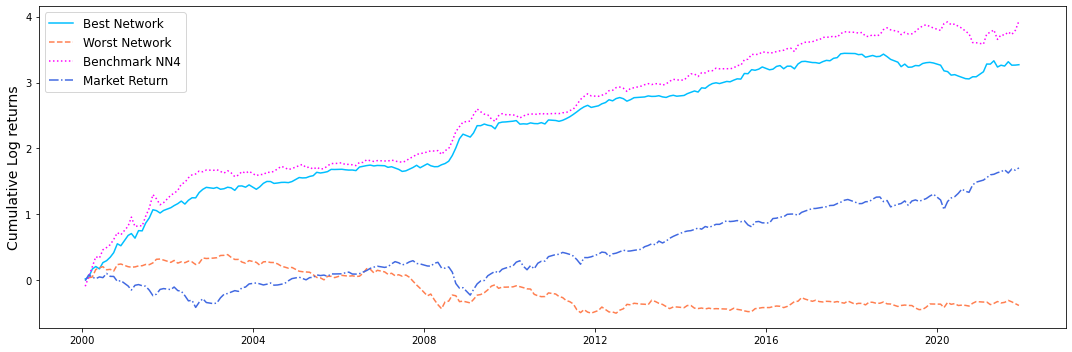

In [17]:
from cycler import cycler
import datetime as dt
import matplotlib.pyplot as plt


# cum_returns = cum_returns.merge(mkt_ret, on=['yyyymm'], how='left')
# cum_returns.iloc[:,-1] = (np.log(cum_returns.iloc[:,-1]/100+1).cumsum())

cum_returns['date'] = cum_returns['yyyymm'].apply(lambda x: dt.datetime.strptime(str(x), '%Y%m'))
# print('Self.cum_returns columns are:')
# print(self.cum_returns.columns)
linestyle_cycler = (cycler('color', ['deepskyblue','coral','magenta','royalblue', 'red','lime', 'crimson', 'cyan','springgreen','teal','gray','darkorange']) +
                    cycler('linestyle',['-','--',':','-.',':','-','-.','--','-',':','-.','--']))


fig = plt.figure(figsize=(15, 5))
ax = plt.gca()
ax.set_prop_cycle(linestyle_cycler)
plt.plot(cum_returns['date'], cum_returns.iloc[:,1:-1]) # plt.plot(l, ret.iloc[:,1:])
plt.ylabel('Cumulative Log returns', fontsize=14)
plt.legend(['Best Network', 'Worst Network', 'Benchmark NN4', 'Market Return'], fontsize=12)
plt.tight_layout()
plt.savefig(path)
plt.show()
# try:
#     plt.savefig(path)
# except:
#     pass


In [18]:
returns = best.copy()
returns = returns.rename({'predicted_ret':'best'}, axis=1)
returns = returns.merge(worst.drop('ret',axis=1), on=['permno','yyyymm'], how='left').rename({'predicted_ret':'worst'},axis=1)
returns = returns.merge(benchmark.drop('ret',axis=1), on=['permno','yyyymm'], how='left').rename({'predicted_ret':'benchmark'},axis=1)

In [19]:
import data.data_preprocessing as dp
crsp = dp.load_crsp()

In [20]:
returns

,permno,yyyymm,ret,best,worst,benchmark
0,10012,200007,1.971035,-1.063426,0.155518,-3.304026
1,10012,200008,-19.708851,-1.253820,0.256265,-3.999563
2,10012,200009,-8.776287,-0.129326,-0.023827,-1.083505
3,10012,200010,-20.193472,-0.434819,0.008014,-0.841462
4,10012,200011,-23.948850,-0.215341,0.278339,-0.356379
...,...,...,...,...,...,...
473013,81142,200012,-5.949393,-0.537021,-0.233692,-0.480802
473014,81142,200102,-9.966968,-0.228824,-0.217637,-1.728006
473015,81142,200103,-26.455221,-1.938750,-0.109768,-2.655634
473016,81142,200104,-20.541618,-0.658445,-0.192161,-0.914404


In [21]:
returns = returns.drop('ret',axis=1).merge(crsp[['permno','yyyymm','ret']], on=['permno','yyyymm'], how='left')

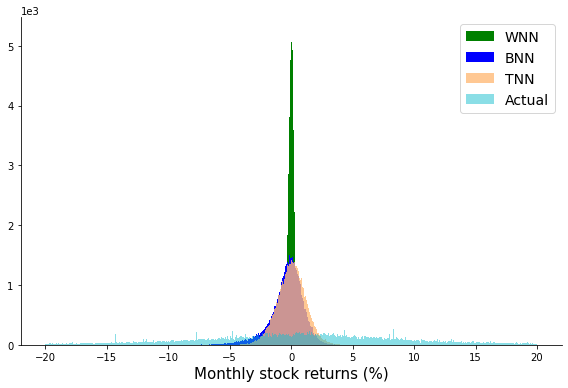

In [43]:
# Remove the plot frame lines. They are unnecessary chartjunk.
# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare  
# exception because of the number of lines being plotted on it.  
# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(8, 5.5))

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()



# Distribution of actual returns and predicted returns
bins = np.linspace(-20, 20, 5000)
# bins2 = np.linspace(-20,20,10000)
# bins = 1000
x1 = returns['best']
x2 = returns['worst']
x3 = returns['benchmark']
x4 = returns['ret']
plt.hist(x2, bins, label='WNN', color='green')
plt.hist(x3, bins, label='BNN', color='blue')#, edgecolor='blue')
plt.hist(x1, bins, alpha=0.8, label='TNN', color=tableau20[3])
plt.hist(x4, bins, alpha=0.5, label='Actual', color=tableau20[18])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.xticks(range(-30, 30, 5), fontsize=13)
# plt.yticks(range(0, 120000, 20000), fontsize=13)
plt.legend(loc='upper right', fontsize=14)
plt.xlabel("Monthly stock returns (%)", fontsize=15)
# plt.ylim(1, 1750)
# plt.xlim(-10, 10)

plt.tight_layout()
plt.savefig('/home/ge65cuw/thesis/output.png', dpi= 400)
plt.show()
# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.
# plt.savefig("Returns_distribution.png", bbox_inches="tight")
